In [1]:
import gradio as gr
import torch
from src.train import train
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
breast = load_breast_cancer()
feature_names = breast.feature_names
model,data = train(X=X, y=y,save=True,model_state=None)

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [4]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(data["X_test_tensor"])
    y_pred = (y_pred_probs > 0.5).int()

In [5]:
y_pred_np = y_pred.numpy().flatten()
y_true_np = data["y_test_tensor"].numpy().flatten()

print(classification_report(y_true_np, y_pred_np, target_names=["malignant", "benign"]))


              precision    recall  f1-score   support

   malignant       0.97      0.69      0.81        42
      benign       0.85      0.99      0.91        72

    accuracy                           0.88       114
   macro avg       0.91      0.84      0.86       114
weighted avg       0.89      0.88      0.87       114



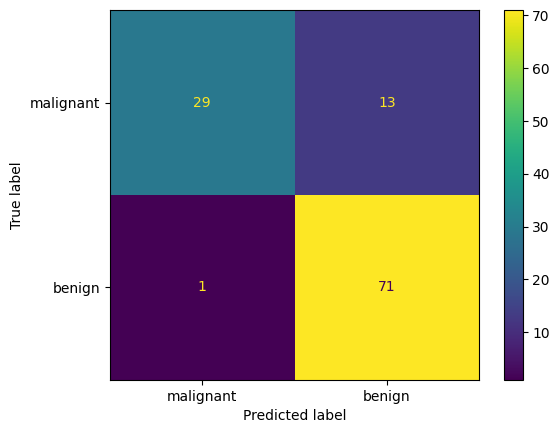

In [6]:
cm = confusion_matrix(y_true_np, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["malignant", "benign"])
disp.plot()

# DEXIRE

In [7]:
from explainer.dexire import get_dexire_rules

In [8]:
rules = get_dexire_rules(model,data)

y_train unique values: [0 1]
class_names: ['malignant', 'benign']
10
feature_10
Symbolic expression: feature_10 <= 0.5
1
feature_1
Symbolic expression: feature_1 <= 0.5
Symbolic expression: feature_1 > 0.5
5
feature_5
Symbolic expression: feature_5 <= 0.5
14
feature_14
Symbolic expression: feature_14 <= 0.5
Symbolic expression: feature_14 > 0.5
3
feature_3
Symbolic expression: feature_3 <= 0.5
Symbolic expression: feature_3 > 0.5
Symbolic expression: feature_5 > 0.5
Symbolic expression: feature_10 > 0.5
11
feature_11
Symbolic expression: feature_11 <= 0.5
Symbolic expression: feature_11 > 0.5
7
X_7
Symbolic expression: X_7 <= 0.185
5
X_5
Symbolic expression: X_5 <= 0.911
27
X_27
Symbolic expression: X_27 <= 0.411
25
X_25
Symbolic expression: X_25 <= 1.011
Symbolic expression: X_25 > 1.011
Symbolic expression: X_27 > 0.411
Symbolic expression: X_5 > 0.911
Symbolic expression: X_7 > 0.185
22
X_22
Symbolic expression: X_22 <= -0.333
Symbolic expression: X_22 > -0.333
1
X_1
Symbolic expres

In [9]:
rules

[IF ((X_7 > 0.185) AND (X_22 > -0.333) AND (X_1 > -1.161) AND (X_6 <= -0.085)) THEN malignant, IF ((X_27 > -0.079) AND (X_1 <= -0.797)) THEN malignant, IF ((X_27 <= -0.079) AND (X_6 > -0.256)) THEN malignant, IF ((X_7 > 0.185) AND (X_22 > -0.333) AND (X_1 > -1.161) AND (X_6 > -0.085) AND (X_19 > 3.448)) THEN malignant, IF ((X_22 <= 0.327) AND (X_6 <= 0.566) AND (X_27 <= 0.821)) THEN malignant, IF ((X_27 <= -0.079) AND (X_6 <= -0.256) AND (X_20 <= 0.573) AND (X_29 <= 1.438) AND (X_27 <= -0.104) AND (X_13 > 0.106)) THEN malignant, IF ((X_27 <= -0.079) AND (X_6 <= -0.256) AND (X_20 <= 0.573) AND (X_29 <= 1.438) AND (X_27 > -0.104)) THEN malignant, IF ((X_7 <= 0.185) AND (X_5 <= 0.911) AND (X_27 <= 0.411) AND (X_25 > 1.011)) THEN malignant, IF ((X_22 > 0.327) AND (X_27 > -0.404) AND (X_12 <= 0.007)) THEN benign, IF ((X_7 > 0.185) AND (X_22 > -0.333) AND (X_1 <= -1.161)) THEN malignant, IF ((X_22 > 0.327) AND (X_27 <= -0.404)) THEN malignant, IF ((X_27 > -0.079) AND (X_1 > -0.797) AND (X_5 

# CIU

In [10]:
from explainer.ciu import get_explainer_CIU, get_ciu_instance
import pandas as pd

In [11]:
CIU_model = get_explainer_CIU(model, data,output_names=["malignant", "benign"], feature_names=feature_names)

In [12]:
X_test_df = pd.DataFrame(data["X_test"],  columns=feature_names)
res = get_ciu_instance(CIU_model, X_test_df.iloc[[0]])

In [13]:
display(res)

,CI,CU,Cinfl,outname,outval,feature,ymin,ymax,inputs,invals,neutralCU,target_concept,target_inputs
mean radius,0.039912,0.771403,0.010832,malignant,0.475693,mean radius,0.444905,0.484817,[0],[-0.5076162267982459],0.5,None,None
mean texture,0.062651,0.297545,-0.012684,malignant,0.475693,mean texture,0.457051,0.519703,[1],[1.7616716097081349],0.5,None,None
mean perimeter,0.057908,0.688123,0.010894,malignant,0.475693,mean perimeter,0.435845,0.493753,[2],[-0.4456381518022825],0.5,None,None
mean area,0.006457,0.291543,-0.001346,malignant,0.475693,mean area,0.473810,0.480267,[3],[-0.5047972236995621],0.5,None,None
mean smoothness,0.014639,0.645883,0.002136,malignant,0.475693,mean smoothness,0.466238,0.480877,[4],[0.5009846999679067],0.5,None,None
mean compactness,0.015139,0.609488,0.001658,malignant,0.475693,mean compactness,0.466466,0.481605,[5],[0.5867191508371725],0.5,None,None
mean concavity,0.016872,0.308200,-0.003236,malignant,0.475693,mean concavity,0.470493,0.487365,[6],[0.24734152060397854],0.5,None,None
mean concave points,0.006122,0.820611,0.001963,malignant,0.475693,mean concave points,0.470669,0.476791,[7],[-0.08509811026774378],0.5,None,None
mean symmetry,0.018718,0.493799,-0.000116,malignant,0.475693,mean symmetry,0.466450,0.485168,[8],[0.479665948454549],0.5,None,None
mean fractal dimension,0.022634,0.643997,0.003259,malignant,0.475693,mean fractal dimension,0.461117,0.483751,[9],[0.931704695578668],0.5,None,None


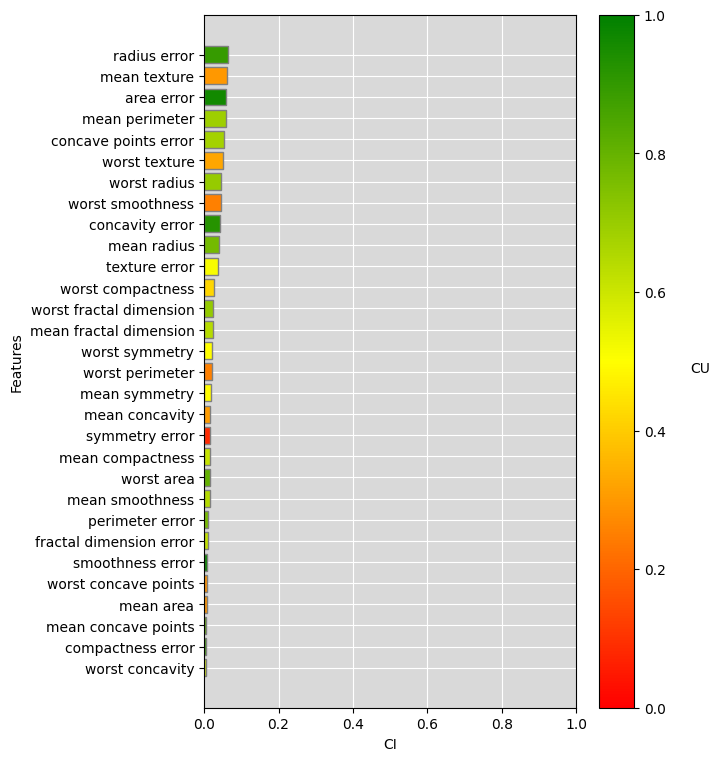

In [14]:
p = CIU_model.plot_ciu(res, figsize=(6,9))

# DEXIRE-EVO

In [15]:
from dexire_evo.ga_engine import GAEngine
from dexire_evo.rule_formatter import format_if_elif_else
from sklearn.metrics import accuracy_score, classification_report
from src.config import Config
from explainer.dexire_evo import get_dexire_evo_rules

In [16]:
best, test_acc, uncov_te, engine = get_dexire_evo_rules(feature_names, model, data)


GEN 001: fid=1.000, preds=3.0, uncov=298.0
GEN 010: fid=1.000, preds=4.0, uncov=290.0
GEN 020: fid=1.000, preds=3.0, uncov=215.0
GEN 030: fid=1.000, preds=3.0, uncov=215.0
GEN 040: fid=1.000, preds=3.0, uncov=215.0
GEN 050: fid=1.000, preds=3.0, uncov=215.0
GEN 060: fid=1.000, preds=13.0, uncov=129.0
GEN 070: fid=1.000, preds=11.0, uncov=105.0
GEN 080: fid=1.000, preds=11.0, uncov=105.0
GEN 090: fid=1.000, preds=10.0, uncov=102.0
GEN 100: fid=1.000, preds=10.0, uncov=102.0
GEN 110: fid=1.000, preds=11.0, uncov=98.0
GEN 120: fid=1.000, preds=11.0, uncov=98.0
GEN 130: fid=1.000, preds=10.0, uncov=97.0
GEN 140: fid=1.000, preds=8.0, uncov=97.0
GEN 150: fid=1.000, preds=8.0, uncov=77.0
GEN 160: fid=1.000, preds=8.0, uncov=77.0
GEN 170: fid=1.000, preds=8.0, uncov=77.0
GEN 180: fid=1.000, preds=8.0, uncov=77.0
GEN 190: fid=1.000, preds=8.0, uncov=77.0
GEN 200: fid=1.000, preds=8.0, uncov=77.0


In [17]:
print("\nRules in IF–ELIF–ELSE form (GA):")
print(format_if_elif_else(best, feature_names, engine.operator_set))


Rules in IF–ELIF–ELSE form (GA):
if mean concavity <= 0.04 AND worst smoothness < 1.84 AND radius error <= 0.03: class = 1
elif worst concave points < -0.26 AND area error <= 6.80 AND worst compactness <= 1.17: class = 1
elif mean radius >= 1.18: class = 0
else worst concave points > 1.71: class = 0


In [18]:
print("\n=== FINAL GA RESULTS ===")
print(f"Fidelity (train vs model): {best.fitness.values[0]:.3f}")
print(f"# Predicates             : {best.fitness.values[1]}")
print(f"Uncovered (train)        : {best.fitness.values[2]}")
print(f"Test accuracy (matched)  : {test_acc:.3f} | Uncov test: {uncov_te}")


=== FINAL GA RESULTS ===
Fidelity (train vs model): 1.000
# Predicates             : 8.0
Uncovered (train)        : 77.0
Test accuracy (matched)  : 0.909 | Uncov test: 26


In [19]:
def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

In [20]:
main = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
    api_name="predict"
)

In [21]:
#main.launch() # add share=True to have a public server 